In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD

# XOR 데이터셋
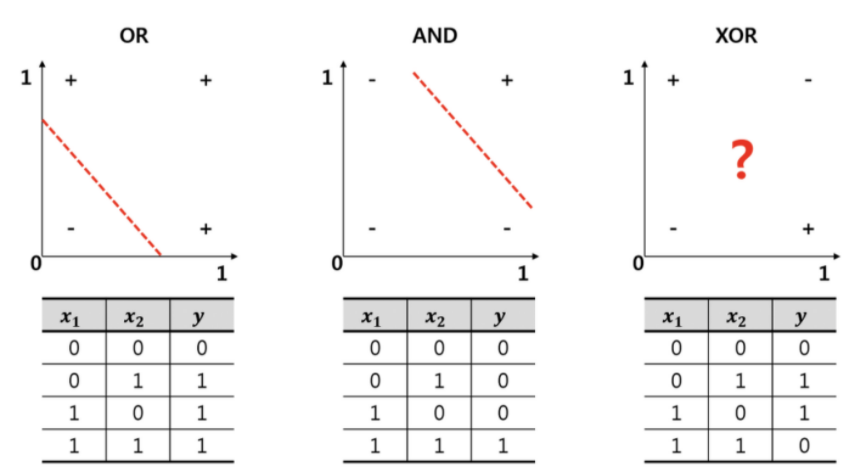

In [3]:
x_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y_data = np.array([[0], [1], [1], [0]], dtype=np.float32)


# XOR 이진 논리회귀

In [4]:
model = Sequential([
  Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.1))

model.fit(x_data, y_data, epochs=1000, verbose=0) #verbose를 1로 하면 학습결과를 출력해준다

In [5]:
y_pred = model.predict(x_data)

print(y_pred)

[[0.49957013]
 [0.49936706]
 [0.500498  ]
 [0.5002949 ]]


# XOR 딥러닝(MLP)

In [6]:
model = Sequential([
  Dense(8, activation='relu'),
  Dense(1, activation='sigmoid'),
])

model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.1))

model.fit(x_data, y_data, epochs=1000, verbose=0)

In [7]:
y_pred = model.predict(x_data)

print(y_pred)

[[0.02053472]
 [0.99024284]
 [0.98615336]
 [0.01088247]]


# Keras Functional API
우리는 지금까지 Keras의 Sequential 클래스를 사용하여 Sequential API를 사용했습니다. Sequential API는 순차적인 모델 설계에는 편리한 API 이지만, 복잡한 네트워크를 설계하기에는 한계가 있기 때문에 실무에서는 Functional API를 주로 사용합니다.

위에서 했던 XOR 딥러닝 문제를 Functional API로 다시 작성해보겠습니다!

In [8]:
import numpy as np
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam, SGD

model.summary() 를 사용하여 모델의 구조를 확인할 수 있습니다.

Sequential API를 사용하면 구조를 확인하기 힘들지만 Functional API를 사용하면 model.summary()를 사용하여 구조를 확인하기 쉽다는 장점도 있습니다.

In [10]:
#Fucntional API
input = Input(shape=(2,)) #x1, x2 두개의 열
hidden = Dense(8, activation='relu')(input)
output = Dense(1, activation='sigmoid')(hidden)

#model을 사용해준다 (여러개의 input과 output을 사용해줄수 있다 )
model = Model(inputs=input, outputs=output)

model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.1))

model.summary()
#None은 배치사이즈의 개수를 말한다 

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 24        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 9         
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.fit(x_data, y_data, epochs=1000, verbose=0)

y_pred = model.predict(x_data)

print(y_pred)

[[0.02747479]
 [0.9891599 ]
 [0.9887042 ]
 [0.00766021]]


In [12]:
import os
os.environ['KAGGLE_USERNAME'] = 'parkjaeyoung' # username
os.environ['KAGGLE_KEY'] = '4c16bfdb89a9449e8972bbc76d2f95aa' # key

In [13]:
!kaggle datasets download -d datamunge/sign-language-mnist


  0%|          | 0.00/62.6M [00:00<?, ?B/s]
  2%|1         | 1.00M/62.6M [00:00<00:07, 8.25MB/s]
  5%|4         | 3.00M/62.6M [00:00<00:05, 11.3MB/s]
  8%|7         | 5.00M/62.6M [00:00<00:05, 11.6MB/s]
 11%|#1        | 7.00M/62.6M [00:00<00:05, 10.4MB/s]
 14%|#4        | 9.00M/62.6M [00:00<00:05, 11.0MB/s]
 18%|#7        | 11.0M/62.6M [00:01<00:04, 11.0MB/s]
 21%|##        | 13.0M/62.6M [00:01<00:04, 11.3MB/s]
 24%|##3       | 15.0M/62.6M [00:01<00:04, 11.0MB/s]
 27%|##7       | 17.0M/62.6M [00:02<00:08, 5.37MB/s]
 30%|###       | 19.0M/62.6M [00:02<00:07, 6.47MB/s]
 34%|###3      | 21.0M/62.6M [00:02<00:05, 7.43MB/s]
 37%|###6      | 23.0M/62.6M [00:02<00:04, 8.47MB/s]
 40%|###9      | 25.0M/62.6M [00:02<00:04, 9.25MB/s]
 43%|####3     | 27.0M/62.6M [00:03<00:03, 9.67MB/s]
 46%|####6     | 29.0M/62.6M [00:03<00:03, 10.4MB/s]
 50%|####9     | 31.0M/62.6M [00:03<00:03, 10.8MB/s]
 53%|#####2    | 33.0M/62.6M [00:03<00:02, 11.0MB/s]
 56%|#####5    | 35.0M/62.6M [00:03<00:02, 11.3MB/s]
 

In [14]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam, SGD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [15]:
train_df = pd.read_csv('./sign-language-mnist/sign_mnist_train.csv')

train_df.head()
#28 x 28 = 785

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [16]:
test_df = pd.read_csv('./sign-language-mnist/sign_mnist_test.csv')

test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


# 라벨 분포
9=J or 25=Z 는 동작이 들어가므로 제외
총 24개의 라벨

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


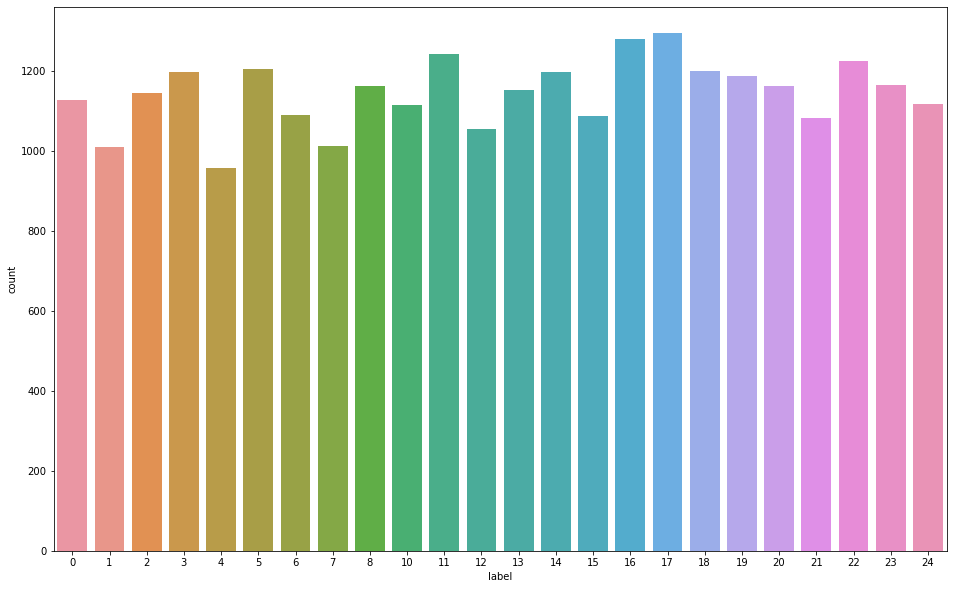

In [17]:
plt.figure(figsize=(16, 10))
sns.countplot(train_df['label'])
plt.show()

# 전처리
입력과 출력나누기

In [18]:
train_df = train_df.astype(np.float32)
x_train = train_df.drop(columns=['label'], axis=1).values
y_train = train_df[['label']].values

test_df = test_df.astype(np.float32)
x_test = test_df.drop(columns=['label'], axis=1).values
y_test = test_df[['label']].values

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(27455, 784) (27455, 1)
(7172, 784) (7172, 1)


# 데이터 미리보기

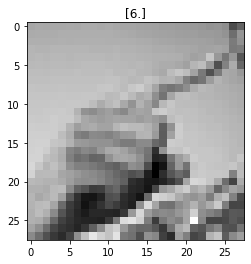

In [19]:
index = 1
plt.title(str(y_train[index]))
plt.imshow(x_train[index].reshape((28, 28)), cmap='gray')
plt.show()

# One hot encoding

In [20]:
#label 값만 one hot encoding
encoder = OneHotEncoder()
y_train = encoder.fit_transform(y_train).toarray()
y_test = encoder.fit_transform(y_test).toarray()

print(y_train.shape)

(27455, 24)


# 일반화
이미지 데이터는 픽셀이 0-255 사이의 정수(unsigned integer 8bit = uint8)로 되어 있습니다. 이것을 255로 나누어 0-1 사이의 **소수점 데이터(floating point 32bit = float32)**로 바꾸고 일반화 시키도록 할게요!

In [21]:
# 0~1 사이의 값을가진다 
x_train = x_train / 255.
x_test = x_test / 255.

In [22]:
input = Input(shape=(784,))
hidden = Dense(1024, activation='relu')(input)
hidden = Dense(512, activation='relu')(hidden)
hidden = Dense(256, activation='relu')(hidden)
output = Dense(24, activation='softmax')(hidden)

model = Model(inputs=input, outputs=output)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['acc'])

model.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_8 (Dense)              (None, 1024)              803840    
_________________________________________________________________
dense_9 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_10 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_11 (Dense)             (None, 24)                6168      
Total params: 1,466,136
Trainable params: 1,466,136
Non-trainable params: 0
_________________________________________________________________


In [23]:
history = model.fit(
    x_train,
    y_train,
    validation_data=(x_test, y_test), # 검증 데이터를 넣어주면 한 epoch이 끝날때마다 자동으로 검증
    epochs=20 # epochs 복수형으로 쓰기!
)

Epoch 1/20
858/858 [==============================] - 8s 9ms/step - loss: 1.7043 - acc: 0.4426 - val_loss: 1.3310 - val_acc: 0.5802
Epoch 2/20
858/858 [==============================] - 7s 8ms/step - loss: 0.6167 - acc: 0.7843 - val_loss: 0.9789 - val_acc: 0.7079
Epoch 3/20
858/858 [==============================] - 7s 8ms/step - loss: 0.2908 - acc: 0.9007 - val_loss: 0.9919 - val_acc: 0.7393
Epoch 4/20
858/858 [==============================] - 7s 8ms/step - loss: 0.1839 - acc: 0.9381 - val_loss: 0.8312 - val_acc: 0.7843
Epoch 5/20
858/858 [==============================] - 8s 9ms/step - loss: 0.1223 - acc: 0.9593 - val_loss: 1.2743 - val_acc: 0.7552
Epoch 6/20
858/858 [==============================] - 7s 8ms/step - loss: 0.0555 - acc: 0.9821 - val_loss: 0.9531 - val_acc: 0.8279
Epoch 7/20
858/858 [==============================] - 7s 8ms/step - loss: 0.1074 - acc: 0.9668 - val_loss: 0.8104 - val_acc: 0.8139
Epoch 8/20
858/858 [==============================] - 7s 8ms/step - loss: 0.

# 학습 결과 그래프 

In [ ]:
plt.figure(figsize=(16, 10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])